<a href="https://colab.research.google.com/github/steve122192/stock_portfolio_analysis/blob/master/Portfolio_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
import yfinance as yf
import datetime
import pandas_datareader.data as web
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
top_holdings = ['PENN','TSLA','AMZN']
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2020, 9, 16)

In [ ]:
df = web.DataReader(top_holdings,'yahoo',start=start,end=end)
df

Attributes  Adj Close              ...      Volume           
Symbols          PENN        TSLA  ...        TSLA       AMZN
Date                               ...                       
2019-01-02  19.450001   62.023998  ...  58293000.0  7983100.0
2019-01-03  19.940001   60.071999  ...  34826000.0  6975600.0
2019-01-04  21.180000   63.537998  ...  36970500.0  9182600.0
2019-01-07  22.510000   66.991997  ...  37756000.0  7993200.0
2019-01-08  23.190001   67.070000  ...  35042500.0  8881400.0
...               ...         ...  ...         ...        ...
2020-09-10  62.459999  371.339996  ...  84930600.0  5330700.0
2020-09-11  59.189999  372.720001  ...  60717500.0  5094000.0
2020-09-14  65.540001  419.619995  ...  83020600.0  4529600.0
2020-09-15  68.230003  449.760010  ...  97298200.0  4021500.0
2020-09-16  67.839996  441.760010  ...  72279300.0  4512200.0

[431 rows x 18 columns]

In [ ]:
close = df['Close']

In [ ]:
# Find cumulative percent return
((close['TSLA'].pct_change()+1).cumprod()-1)*100

Date
2019-01-02           NaN
2019-01-03     -3.147168
2019-01-04      2.440991
2019-01-07      8.009800
2019-01-08      8.135563
                 ...    
2020-09-10    498.703738
2020-09-11    500.928692
2020-09-14    576.544574
2020-09-15    625.138692
2020-09-16    612.240459
Name: TSLA, Length: 431, dtype: float64

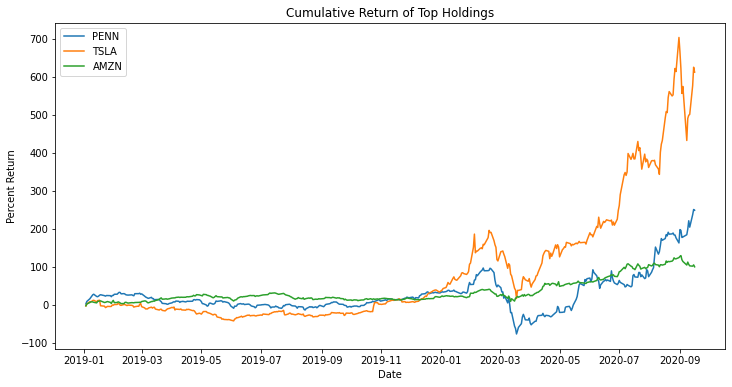

In [ ]:
# Plot perecent return over time
fig, ax = plt.subplots(figsize=(12,6))
for ticker in top_holdings:
  ax.plot(((close[ticker].pct_change()+1).cumprod()-1)*100, linewidth=1.5, label=ticker)
ax.legend()
plt.title('Cumulative Return of Top Holdings')
plt.ylabel('Percent Return')
plt.xlabel('Date')
plt.show()
plt.close()

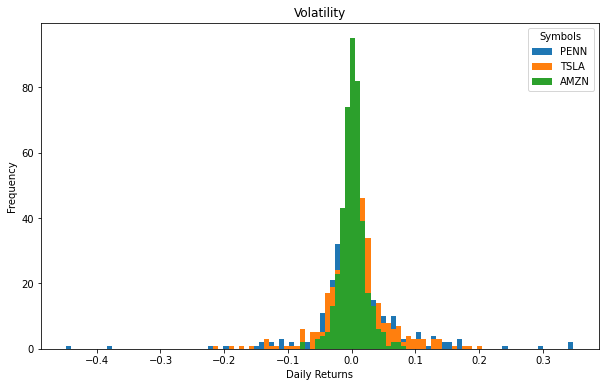

In [ ]:
# Compare volatility distributions
daily_returns = close.pct_change()
daily_returns.plot.hist(bins=100, figsize=(10,6))
plt.title('Volatility')
plt.xlabel('Daily Returns')
plt.show()

## Penn Analysis

In [ ]:
import numpy as np
import plotly.graph_objects as go

In [ ]:
penn_data = web.DataReader('PENN','yahoo',start=start,end=end)

In [ ]:
# Build Candlesticks
candle = {
    'x': penn_data.index,
    'open': penn_data.Open,
    'close': penn_data.Close,
    'high': penn_data.High,
    'low': penn_data.Low,
    'type': 'candlestick',
    'name': 'Penn',
    'showlegend': False
}

data = [candle]
# Config graph layout
layout = go.Layout({
    'title': {
        'text': 'Penn',
        'font': {
            'size': 15
        }
    }
})


In [ ]:
# Plot Candlesticks
fig = go.Figure(data=data, layout=layout)
fig.show()

# Forecast Volume & Price

In [ ]:
!pip install fbprophet
from fbprophet import Prophet

In [ ]:
volume = penn_data['Volume']
volume = volume.to_frame()
volume = volume.reset_index()
volume.rename(columns={'Date': 'ds', 'Volume': 'y'}, inplace=True)
volume.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [ ]:
volume = volume[volume['ds']>'2020-5-31']
volume

,ds,y
355,2020-06-01,13099500
356,2020-06-02,16698900
357,2020-06-03,14161400
358,2020-06-04,25079000
359,2020-06-05,18974600
...,...,...
426,2020-09-10,20658500
427,2020-09-11,9485000
428,2020-09-14,11293000
429,2020-09-15,11630200


In [ ]:
model = Prophet(daily_seasonality=True)
model.fit(volume)
forecast = model.make_future_dataframe(periods=20,freq='D')
forecast = model.predict(forecast)
forecast

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-06-01,7.974891e+05,7.331359e+06,1.937349e+07,7.974891e+05,7.974891e+05,1.261532e+07,1.261532e+07,1.261532e+07,1.276051e+07,1.276051e+07,1.276051e+07,-1.451828e+05,-1.451828e+05,-1.451828e+05,0.0,0.0,0.0,1.341281e+07
1,2020-06-02,7.246906e+05,8.456644e+06,1.952670e+07,7.246906e+05,7.246906e+05,1.331291e+07,1.331291e+07,1.331291e+07,1.276051e+07,1.276051e+07,1.276051e+07,5.524048e+05,5.524048e+05,5.524048e+05,0.0,0.0,0.0,1.403760e+07
2,2020-06-03,6.518921e+05,7.972117e+06,1.976246e+07,6.518921e+05,6.518921e+05,1.327463e+07,1.327463e+07,1.327463e+07,1.276051e+07,1.276051e+07,1.276051e+07,5.141242e+05,5.141242e+05,5.141242e+05,0.0,0.0,0.0,1.392652e+07
3,2020-06-04,5.790936e+05,1.000343e+07,2.158197e+07,5.790936e+05,5.790936e+05,1.502279e+07,1.502279e+07,1.502279e+07,1.276051e+07,1.276051e+07,1.276051e+07,2.262285e+06,2.262285e+06,2.262285e+06,0.0,0.0,0.0,1.560189e+07
4,2020-06-05,5.062951e+05,7.435552e+06,1.903726e+07,5.062951e+05,5.062951e+05,1.276700e+07,1.276700e+07,1.276700e+07,1.276051e+07,1.276051e+07,1.276051e+07,6.495624e+03,6.495624e+03,6.495624e+03,0.0,0.0,0.0,1.327330e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2020-10-02,-8.155608e+06,-1.032493e+06,1.040679e+07,-8.155625e+06,-8.155591e+06,1.276700e+07,1.276700e+07,1.276700e+07,1.276051e+07,1.276051e+07,1.276051e+07,6.495624e+03,6.495624e+03,6.495624e+03,0.0,0.0,0.0,4.611394e+06
92,2020-10-03,-8.228393e+06,-2.684038e+06,8.678093e+06,-8.228411e+06,-8.228374e+06,1.116544e+07,1.116544e+07,1.116544e+07,1.276051e+07,1.276051e+07,1.276051e+07,-1.595063e+06,-1.595063e+06,-1.595063e+06,0.0,0.0,0.0,2.937051e+06
93,2020-10-04,-8.301177e+06,-2.576443e+06,8.305986e+06,-8.301197e+06,-8.301156e+06,1.116544e+07,1.116544e+07,1.116544e+07,1.276051e+07,1.276051e+07,1.276051e+07,-1.595063e+06,-1.595063e+06,-1.595063e+06,0.0,0.0,0.0,2.864267e+06
94,2020-10-05,-8.373961e+06,-9.465216e+05,1.082892e+07,-8.373983e+06,-8.373939e+06,1.261532e+07,1.261532e+07,1.261532e+07,1.276051e+07,1.276051e+07,1.276051e+07,-1.451828e+05,-1.451828e+05,-1.451828e+05,0.0,0.0,0.0,4.241363e+06


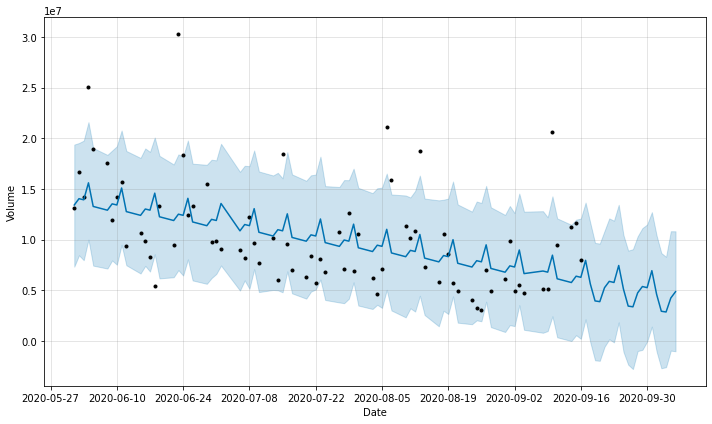

In [ ]:
fig = model.plot(forecast, xlabel='Date',ylabel='Volume')

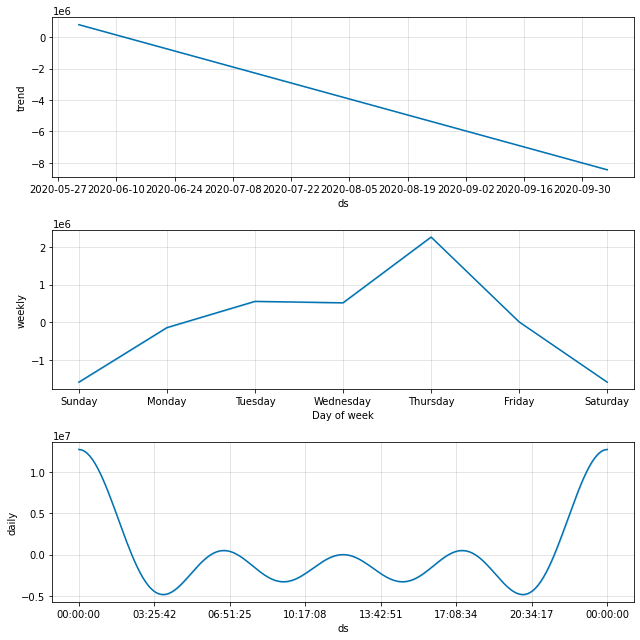

In [ ]:
fig1 = model.plot_components(forecast)
plt.show()

In [ ]:
price = penn_data['Close']
price = price.to_frame()
price = price.reset_index()
price.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
price.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [ ]:
price = price[price['ds']>'2020-5-31']
price

,ds,y
355,2020-06-01,33.150002
356,2020-06-02,31.240000
357,2020-06-03,32.709999
358,2020-06-04,37.369999
359,2020-06-05,36.040001
...,...,...
426,2020-09-10,62.459999
427,2020-09-11,59.189999
428,2020-09-14,65.540001
429,2020-09-15,68.230003


In [ ]:
model = Prophet(daily_seasonality=True)
model.fit(price)
forecast = model.make_future_dataframe(periods=20,freq='D')
forecast = model.predict(forecast)
forecast

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-06-01,1.822201,27.596631,35.442395,1.822201,1.822201,29.875476,29.875476,29.875476,29.154421,29.154421,29.154421,0.721055,0.721055,0.721055,0.0,0.0,0.0,31.697678
1,2020-06-02,1.780415,28.645691,36.284570,1.780415,1.780415,30.511870,30.511870,30.511870,29.154421,29.154421,29.154421,1.357449,1.357449,1.357449,0.0,0.0,0.0,32.292285
2,2020-06-03,1.738629,28.961473,36.788635,1.738629,1.738629,31.033562,31.033562,31.033562,29.154421,29.154421,29.154421,1.879141,1.879141,1.879141,0.0,0.0,0.0,32.772191
3,2020-06-04,1.696842,28.957036,36.659654,1.696842,1.696842,31.132009,31.132009,31.132009,29.154421,29.154421,29.154421,1.977588,1.977588,1.977588,0.0,0.0,0.0,32.828851
4,2020-06-05,1.655056,28.112278,35.833403,1.655056,1.655056,30.507795,30.507795,30.507795,29.154421,29.154421,29.154421,1.353374,1.353374,1.353374,0.0,0.0,0.0,32.162851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2020-10-02,43.143514,69.840118,77.627190,42.536889,43.810063,30.507795,30.507795,30.507795,29.154421,29.154421,29.154421,1.353374,1.353374,1.353374,0.0,0.0,0.0,73.651309
92,2020-10-03,43.680629,65.073375,73.019114,43.014237,44.419385,25.510116,25.510116,25.510116,29.154421,29.154421,29.154421,-3.644305,-3.644305,-3.644305,0.0,0.0,0.0,69.190745
93,2020-10-04,44.217743,65.779885,73.936253,43.489613,45.039121,25.510118,25.510118,25.510118,29.154421,29.154421,29.154421,-3.644303,-3.644303,-3.644303,0.0,0.0,0.0,69.727861
94,2020-10-05,44.754858,71.024992,78.411714,43.971651,45.656595,29.875476,29.875476,29.875476,29.154421,29.154421,29.154421,0.721055,0.721055,0.721055,0.0,0.0,0.0,74.630334


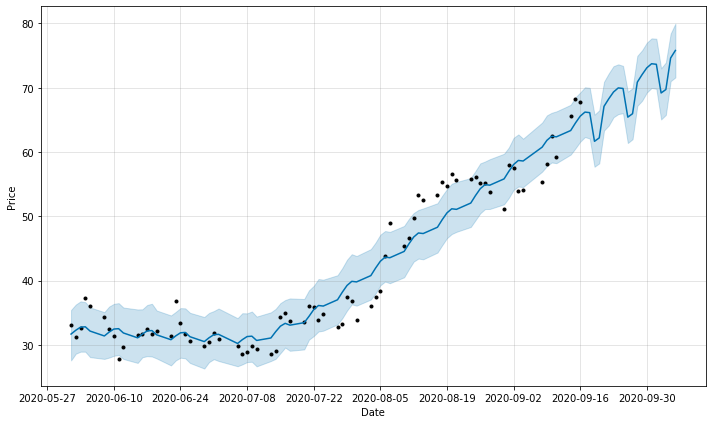

In [ ]:
fig = model.plot(forecast, xlabel='Date',ylabel='Price')


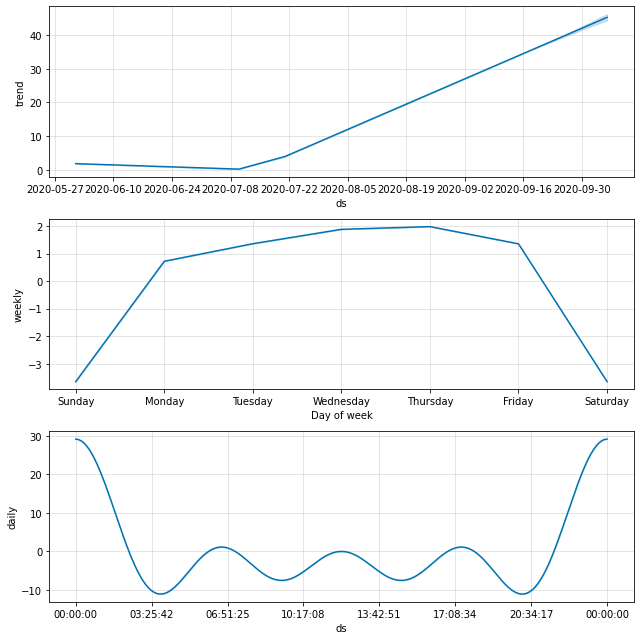

In [ ]:
fig1 = model.plot_components(forecast)
plt.show()